非线性规划是一种目标函数或约束条件中有一个或几个非线性函数的的最优化问题方法。

等式约束  使用拉格朗日乘数法，也就是微分方程的条件极值

不等式约束：ttk方法，类似拉格朗日乘数法，只是要额外把这个约束条件的不等式也放到方程组里面

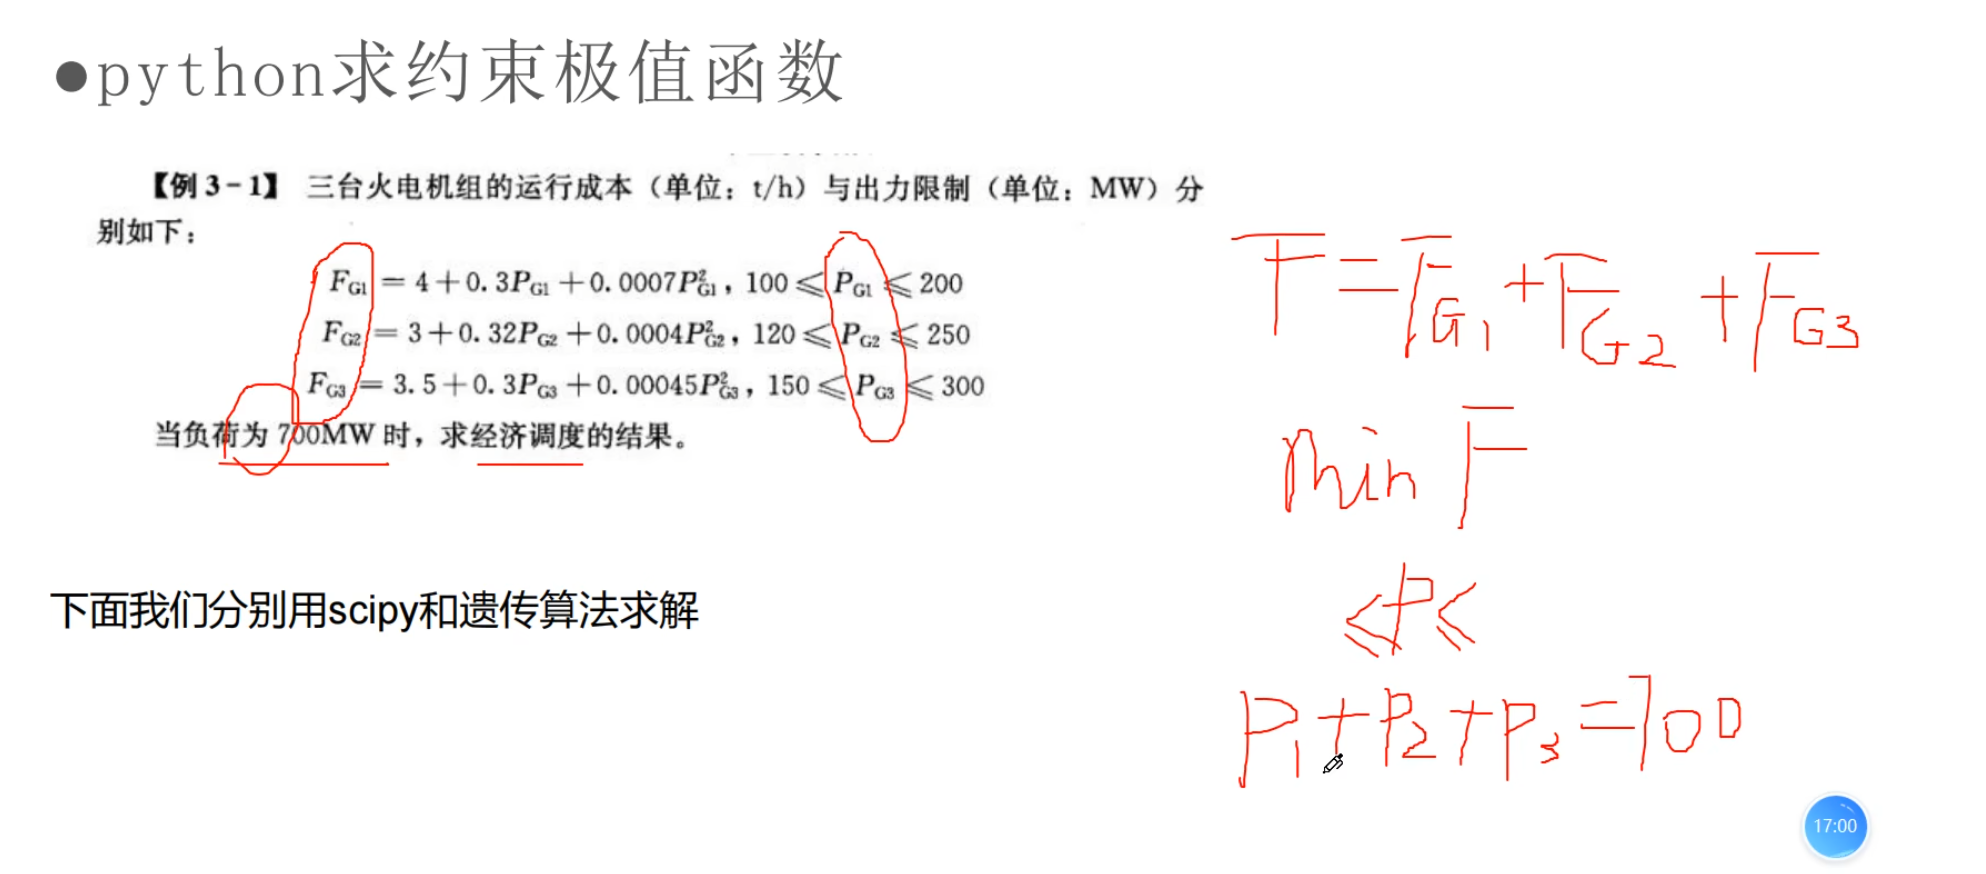

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-25 161613.png")

In [4]:
import numpy as np
from scipy.optimize import minimize
def func(x):
    return 4+0.3*x[0]+0.0007*x[0]**2+3+0.32*x[1]+0.0004*x[1]**2+3.5+0.3*x[2]+0.00045*x[2]**2
def constraint1(x):
    return 700-(x[0]+x[1]+x[2])  # 等式约束
cons = [{'type': 'eq', 'fun': constraint1}]#约束字典，在此填入各项约束内容
bounds=[(100,200),(120,250),(150,300)]

In [ ]:
#对约束条件的另外一种编写方法,只是为了说明不等式的编写，为return函数大于等于0   不推荐用
def constraint2(x):
    return x[0]-100
def constraint3(x):
    return 200 -x[0]
#以此来达成定义边界
def constraint4(x):
    return x[1]-120
def constraint5(x):
    return 250-x[1]
def constraint6(x):
    return x[2]-150
def constraint7(x):
    return 300-x[2]
cons2 = [{'type': 'eq', 'fun': constraint2},
         {'type': 'eq', 'fun': constraint3},
         {'type': 'eq', 'fun': constraint4},
         {'type': 'eq', 'fun': constraint5},
         {'type': 'eq', 'fun': constraint6},
         {'type': 'eq', 'fun': constraint7}]

In [6]:
# 初始猜测值
x0 = [1,1,1]
solution = minimize(func, x0, method='SLSQP', constraints=cons, bounds=bounds)##本质也是求最小值
print(solution)
print(solution.x)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 305.967391309107
       x: [ 1.761e+02  2.500e+02  2.739e+02]
     nit: 12
     jac: [ 5.465e-01  5.200e-01  5.465e-01]
    nfev: 48
    njev: 12
[176.08492223 250.         273.91507777]


In [13]:
#用蒙特卡罗猜测初始值
num_sample = 100 #取样100次
x2 = np.random.uniform(low=(100,120,150),high=(200,250,300),size=(num_sample,3))
results = []##存储遍历的结果
for x0 in x2:
    solution1 = minimize(func, x0, method='SLSQP', constraints=cons, bounds=bounds)
    results.append(solution1)
best_sol = min(results, key=lambda sol: sol.fun) ##求取最小值的最小值,因为初始值会影响结果
print(best_sol)
print(best_sol.x)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 305.9673913043499
       x: [ 1.761e+02  2.500e+02  2.739e+02]
     nit: 8
     jac: [ 5.465e-01  5.200e-01  5.465e-01]
    nfev: 32
    njev: 8
[176.086914 250.       273.913086]


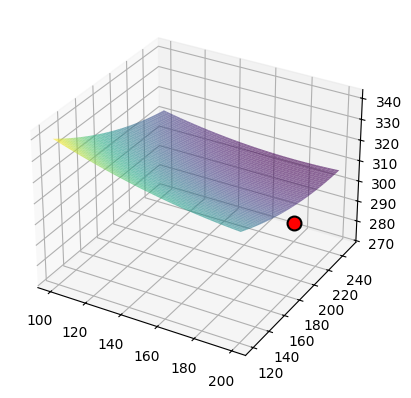

X:
 [[100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]
 [100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]
 [100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]
 ...
 [100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]
 [100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]
 [100.         102.04081633 104.08163265 ... 195.91836735 197.95918367
  200.        ]]


In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#第一个数字（1）：表示图像中子图的行数。在这里，表示有1行。第二个数字（1）：表示图像中子图的列数。在这里，表示有1列。第三个数字（1）：表示当前子图的索引（从1开始）。在这里，表示这是第1个子图。因此，111 的含义是创建一个1行1列的网格，并在这个网格的第1个位置添加子图。简而言之，它表示创建一个只有一个子图的图形。
x = np.linspace(100,200)
y = np.linspace(120,250)
z = np.linspace(150,300)
X, Y = np.meshgrid(x,y)
#X, Y = np.meshgrid(x, y) 是 NumPy 中的一个函数调用，用于生成坐标矩阵。
Z = 4+0.3*X+0.0007*X**2+3+0.32*Y+0.0004*Y**2+3.5+0.3*(700-X-Y)+0.00045*(700-X-Y)**2##通过等式约束代入z
ax.plot_surface(X, Y, Z,cmap ='viridis' ,alpha=0.6) 
#cmap 参数指定了颜色映射（colormap），这里使用的是 viridis。颜色映射用于根据 Z 值给表面着色。viridis 是一种常用的颜色映射，从黄色到绿色再到紫色。
#alpha 参数设置了表面的透明度。
ax.scatter(best_sol.x[0], best_sol.x[1], best_sol.x[2], color='r', marker='o', s=100, edgecolor='k', linewidth=1.5)
#marker='o'：marker 参数指定散点的形状，这里使用的是圆形 ('o')。
## 调整视角  ax.view_init(elev=30, azim=30)
plt.show()
print("X:\n", X)
